## Data visulization I

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [95]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [96]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [98]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [99]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [100]:
numeric_column=df.select_dtypes(include=np.number).columns.tolist()
print("Numeric Columns are ",numeric_column)
df[numeric_column]=df[numeric_column].fillna(df[numeric_column].mean())
df.isna().sum()
## filled numeric columns with the null values with it's columns mean

Numeric Columns are  ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [101]:
df=df.ffill()
df=df.bfill()
df.isna().sum()
## removed NaN for object datatypes

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='Count'>

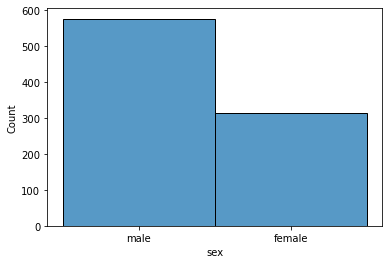

In [102]:
sns.histplot(data=df, x="sex")
#analysis no of males in ship > no of females

<AxesSubplot:ylabel='Frequency'>

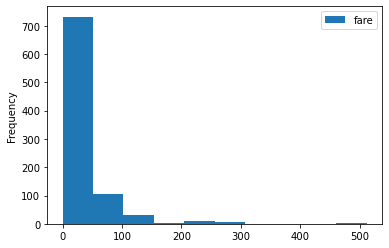

In [103]:
df.plot(kind='hist',x='pclass',y='fare')
# maximum Ticket purchased had prices in 0-100 range

<AxesSubplot:ylabel='Frequency'>

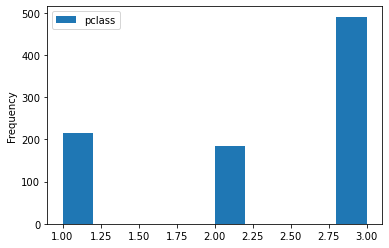

In [104]:
df.plot(kind='hist',y='pclass')
## more pclass 3 than 2 than 1

/home/pict/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<AxesSubplot:xlabel='pclass', ylabel='fare'>

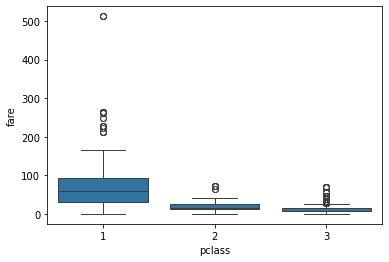

In [105]:
sns.boxplot(x='pclass', y='fare', data=df)
## more people of pclass one paid more price than 2 than 3

<AxesSubplot:xlabel='sex', ylabel='survived'>

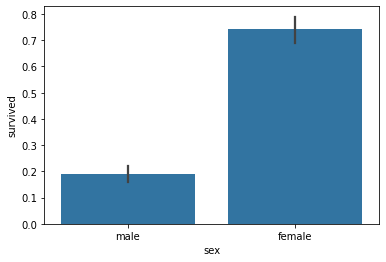

In [106]:
sns.barplot(x='sex', y='survived', data=df)
#large number of females survived

/home/pict/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pict/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/pict/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pict/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and wi

<AxesSubplot:xlabel='pclass', ylabel='age'>

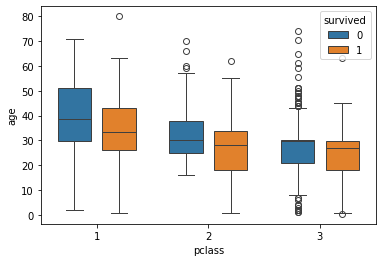

In [107]:
sns.boxplot(x='pclass', y='age', hue='survived', data=df,gap=0.25)
#more people of class 1 survived

<AxesSubplot:xlabel='age', ylabel='fare'>

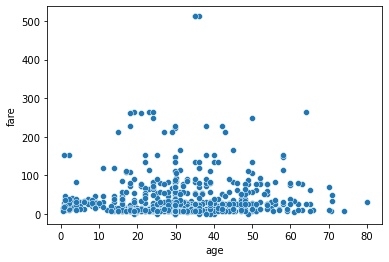

In [108]:
sns.scatterplot(x='age', y='fare', data=df)
## max price was for 20-50 age group people

## Conclusion
1) more females survived than males
2) class1 were rich and paid highest ticket price and maximum were saved
3) max perple were in 20-50 age group people
4) more people of class 3 boarded than 1
5) analysis no of males in ship > no of females
6) maximum Ticket purchased had prices in 0-100$ range